Desafio 17: Análise de Produção Agrícola no Centro-Oeste

📂 Dataset: Produção de diversas culturas em municípios da região Centro-Oeste entre 2019 e 2023.
Colunas: Ano, Município, Cultura, Área_plantada_ha, Produtividade_t/ha, Produção_total_t

🎯 Atividades:

Qual cultura teve a maior produção total acumulada entre os anos?

Qual município apresenta a maior média de produtividade (toneladas por hectare)?

Como está a variação da área plantada para a cultura de soja ao longo dos anos?

Existe alguma cultura que teve queda na produtividade ao longo dos anos?

Crie um gráfico de linha mostrando a produção total anual de milho.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#testando dataset
df = pd.read_csv("dia_17_producao_agricola.csv")
df.head()

,Ano,Município,Cultura,Área_plantada_ha,Produtividade_t/ha,Produção_total_t
0,2021,Anápolis,Soja,8574,3.19,27351.06
1,2023,Cristalina,Cana-de-Açúcar,5861,2.44,14300.84
2,2023,Luziânia,Cana-de-Açúcar,6772,3.97,26884.84
3,2021,Jataí,Algodão,4161,3.36,13980.96
4,2021,Cristalina,Trigo,3036,4.32,13115.52


In [41]:
#Qual cultura teve a maior produção total acumulada entre os anos?
producaoTotalCultura = df.groupby("Cultura")["Produção_total_t"].sum()
print(producaoTotalCultura.to_string())

Cultura
Algodão           284035.55
Cana-de-Açúcar    214316.62
Milho             283557.33
Soja              331348.94
Trigo             383989.81


In [17]:
#Qual município apresenta a maior média de produtividade (toneladas por hectare)?
municipioProd = df.groupby("Município")["Produtividade_t/ha"].mean().sort_values(ascending=False)
print(f"O município com maior média foi: {municipioProd.idxmax()}, com uma média de: {municipioProd.max():.2f} toneladas por hectare")

O município com maior média foi: Rio Verde, com uma média de: 3.51 toneladas por hectare


In [39]:
#Como está a variação da área plantada para a cultura de soja ao longo dos anos?
soja = df[df["Cultura"] == "Soja"]

areaAnoSoja = soja.groupby("Ano")["Área_plantada_ha"].sum()
variacaoAno = areaAnoSoja.diff()
desvio = variacaoAno.std()

print(f"Área plantada por ano: \n{areaAnoSoja.to_string()}\n")
print(f"Variação ano a ano: \n{variacaoAno.to_string()}\n")
print(f"Desvio padrão da área plantada: {desvio:.2f} hectares")

Área plantada por ano: 
Ano
2019    18297
2020     9931
2021    35532
2022    25183
2023    22390

Variação ano a ano: 
Ano
2019        NaN
2020    -8366.0
2021    25601.0
2022   -10349.0
2023    -2793.0

Desvio padrão da área plantada: 16694.47 hectares


In [61]:
#Existe alguma cultura que teve queda na produtividade ao longo dos anos?
prodAno = df.groupby(['Cultura', 'Ano'])['Produtividade_t/ha'].mean().reset_index()
prodAno["Variacao"] = prodAno.groupby('Cultura')['Produtividade_t/ha'].diff()
print(prodAno[prodAno['Variacao'] < 0])

           Cultura   Ano  Produtividade_t/ha  Variacao
3          Algodão  2022            3.303333 -0.240000
4          Algodão  2023            2.738333 -0.565000
6   Cana-de-Açúcar  2020            2.945000 -1.185000
8   Cana-de-Açúcar  2022            3.035000 -1.175000
12           Milho  2021            3.044000 -0.046000
13           Milho  2022            2.385000 -0.659000
15            Soja  2020            2.530000 -0.850000
18            Soja  2023            2.915000 -0.215000
20           Trigo  2020            2.625000 -0.507857
22           Trigo  2022            3.062000 -0.128000
23           Trigo  2023            2.376000 -0.686000


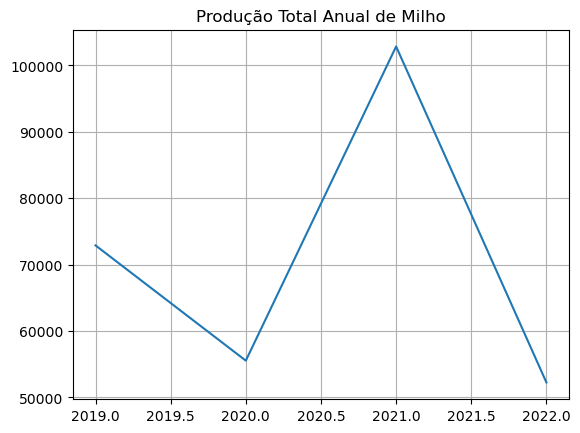

In [60]:
#Crie um gráfico de linha mostrando a produção total anual de milho.
milho = df[df['Cultura'] == 'Milho']
prodAno = milho.groupby('Ano')['Produção_total_t'].sum().reset_index()
plt.plot(prodAno['Ano'], prodAno['Produção_total_t'])
plt.title('Produção Total Anual de Milho')
plt.grid(True)
plt.show()